# INTRODUCCIÓN
* En este notebook, aprenderemos cómo usar la librería plotly.
    * Librería Plotly: La librería de gráficos de Python de Plotly crea gráficos interactivos y de calidad de publicación en línea. Ejemplos de cómo hacer gráficos de líneas, gráficos de dispersión, gráficos de área, gráficos de barras, barras de error, diagramas de caja, histogramas, mapas de calor, subgráficos, ejes múltiples, gráficos polares y gráficos de burbujas.

<br>Contenido:
1. [Carga de Datos y Explicación de Características](#1)
1. [Gráficos de Líneas](#2)
1. [Gráficos de Dispersión](#3)
1. [Gráficos de Barras](#4)
1. [Gráficos de Torta](#5)
1. [Gráficos de Burbujas](#6)
1. [Histograma](#7)
1. [Nube de Palabras](#8)
1. [Diagrama de Caja](#9)
1. [Matriz de Gráficos de Dispersión](#10)
1. Gráficos de Mapas: https://www.kaggle.com/kanncaa1/time-series-prediction-with-eda-of-world-war-2
1. Visualización de Datos
    1. Seaborn: https://www.kaggle.com/kanncaa1/seaborn-for-beginners
    1. Bokeh 1: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-1
    1. Bokeh 2: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-
    1. Visualización Avanzada: https://www.kaggle.com/kanncaa1/rare-visualization-tools
1. [Gráficos Insertados](#11)
1. [Gráfico de Dispersión 3D con Escala de Color](#12)
1. [Múltiples Subgráficos](#13)
1. Animación de Terremotos: https://www.kaggle.com/kanncaa1/earthquake-animation-with-plotly

In [25]:
!pip install plotly
!pip install wordcloud

In [26]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.

['medium_data_2019_01_06', 'Sample - Superstore.xlsx', 'school_earnings.csv', 'timesData.csv', 'tips.csv']


<a id="1"></a> <br>
# Carga de Datos y Explicación de Características
<font color='red'>
* timesData incluye 14 características que son:
    <font color='black'>
        
    * world_rank (ranking mundial)             
    * university_name (nombre de universidad)       
    * country (país)               
    * teaching (enseñanza)                
    * international (internacional)            
    * research (investigación)                 
    * citations (citas)                
    * income (ingresos)                   
    * total_score (puntuación total)              
    * num_students (número de estudiantes)             
    * student_staff_ratio (ratio estudiantes-personal)      
    * international_students (estudiantes internacionales)   
    * female_male_ratio (ratio mujeres-hombres)        
    * year (año)

In [27]:
#py.offline.init_notebook_mode(connected=True) 
# Load data that we will use.
timesData = pd.read_csv("./data/timesData.csv")

In [49]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [29]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [30]:
timesData['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016])

<a id="2"></a> <br>
# Gráficos de Líneas
Ejemplo de Gráficos de Líneas: Citas y Enseñanza vs Ranking Mundial de las Top 100 Universidades
* Importar graph_objs como *go*
* Crear trazas
    * x = eje x
    * y = eje y
    * mode = tipo de gráfico como marker, line o line + markers
    * name = nombre de los gráficos
    * marker = marker se usa con diccionario. 
        * color = color de líneas. Toma RGB (rojo, verde, azul) y opacidad (alpha)
    * text = El texto de hover (hover es el cursor)
* data = es una lista a la que agregamos las trazas
* layout = es un diccionario.
    * title = título del layout
    * x axis = es un diccionario
        * title = etiqueta del eje x
        * ticklen = longitud de las marcas del eje x
* fig = incluye data y layout
* iplot() = grafica la figura (fig) que es creada por data y layout

In [31]:
#!pip install --upgrade nbformat

In [32]:
# prepare data frame
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df['world_rank'],
                    y = df['citations'],
                    name = 'citations',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = df['university_name'])

# Creating trace2
trace2 = go.Scatter(
                    x = df['world_rank'],
                    y = df['teaching'],
                    name = 'teaching',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = df['university_name'])

data = [trace1, trace2]

layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
             xaxis= dict(title= 'World Rank',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)


<a id="3"></a> <br>
# Gráficos de Dispersión
Ejemplo de Gráfico de Dispersión: Citas vs ranking mundial de las top 100 universidades con los años 2014, 2015 y 2016
* Importar graph_objs como *go*
* Crear trazas
    * x = eje x
    * y = eje y
    * mode = tipo de gráfico como marker, line o line + markers
    * name = nombre de los gráficos
    * marker = marker se usa con diccionario. 
        * color = color de líneas. Toma RGB (rojo, verde, azul) y opacidad (alpha)
    * text = El texto de hover (hover es el cursor)
* data = es una lista a la que agregamos las trazas
* layout = es un diccionario.
    * title = título del layout
    * x axis = es un diccionario
        * title = etiqueta del eje x
        * ticklen = longitud de las marcas del eje x
        * zeroline = mostrar línea de cero o no
    * y axis = es un diccionario e igual que x axis
* fig = incluye data y layout
* iplot() = grafica la figura (fig) que es creada por data y layout

In [33]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)

data = [trace1, trace2, trace3]

layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
#fig = go.Figure(data = data, layout=layout)

iplot(fig)

<a id="4"></a> <br>
# Gráficos de Barras
Primer Ejemplo de Gráficos de Barras: citas y enseñanza de las top 3 universidades en 2014 (estilo1)
* Importar graph_objs como *go*
* Crear trazas
    * x = eje x
    * y = eje y
    * mode = tipo de gráfico como marker, line o line + markers
    * name = nombre de los gráficos
    * marker = marker se usa con diccionario. 
        * color = color de líneas. Toma RGB (rojo, verde, azul) y opacidad (alpha)
        * line = Es un diccionario. línea entre barras
            * color = color de línea alrededor de las barras
    * text = El texto de hover (hover es el cursor)
* data = es una lista a la que agregamos las trazas
* layout = es un diccionario.
    * barmode = modo de barras como grouped
* fig = incluye data y layout
* iplot() = grafica la figura (fig) que es creada por data y layout

In [34]:
#?go.Bar

In [35]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

# create trace1 
trace1 = go.Bar(x = df2014['university_name'],
               y = df2014['citations'],
               name = 'citations',
               marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = df2014['country'])

trace2 = go.Bar(x = df2014['university_name'],
               y = df2014['teaching'],
               name = 'teaching',
               marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = df2014['country'])



data = [trace1, trace2]

layout = go.Layout(barmode = "group")

fig = go.Figure(data = data, layout = layout)

iplot(fig)

Segundo Ejemplo de Gráficos de Barras: citas y enseñanza de las top 3 universidades en 2014 (estilo2)
En realidad, si solo cambias el barmode de *group* a *relative* en el ejemplo anterior, logras lo que hicimos aquí. Sin embargo, por diversidad uso diferentes sintaxis. 
* Importar graph_objs como *go*
* Crear trazas
    * x = eje x
    * y = eje y
    * name = nombre de los gráficos
    * type = tipo de gráfico como bar plot
* data = es una lista a la que agregamos las trazas
* layout = es un diccionario.
    * xaxis = etiqueta del eje x
    * barmode = modo de barras como grouped (ejemplo anterior) o relative
    * title = título del layout
* fig = incluye data y layout
* iplot() = grafica la figura (fig) que es creada por data y layout

In [36]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
    'x': x,
    'y': df2014['citations'],
    'name': 'citation',
    'type': 'bar'
}

trace2 = {
    'x': x,
    'y': df2014['teaching'],
    'name': 'teaching',
    'type': 'bar'
}

data = [trace1, trace2]

layout = {
    'xaxis': {'title': 'Top 3 unis'},
    'barmode': 'group',
    'title': 'Citations and teaching top 3 unis'
}

fig = go.Figure(data = data, layout = layout)
iplot(fig)

<a id="5"></a> <br>
# Gráficos de Torta
Ejemplo de Gráficos de Torta: Porcentaje de estudiantes de las top 7 universidades en 2016
* fig: crear figuras
    * data: tipo de gráfico
        * values: valores del gráfico
        * labels: etiquetas del gráfico
        * name: nombre de los gráficos
        * hoverinfo: información en hover
        * hole: ancho del agujero
        * type: tipo de gráfico como pie
    * layout: layout del gráfico
        * title: título del layout
        * annotations: font, showarrow, text, x, y

In [37]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name

# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<a id="6"></a> <br>
# Gráficos de Burbujas
Ejemplo de Gráficos de Burbujas: Ranking mundial de universidades (primeras 20) vs puntuación de enseñanza con número de estudiantes (tamaño) y puntuación internacional (color) en 2016
* x = eje x
* y = eje y
* mode = markers (dispersión)
*  marker = propiedades del marcador
    * color = tercera dimensión del gráfico. Puntuación internacional
    * size = cuarta dimensión del gráfico. Número de estudiantes
* text: nombres de las universidades

In [50]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1803 to 1822
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              20 non-null     object 
 1   university_name         20 non-null     object 
 2   country                 20 non-null     object 
 3   teaching                20 non-null     float64
 4   international           20 non-null     object 
 5   research                20 non-null     float64
 6   citations               20 non-null     float64
 7   income                  20 non-null     object 
 8   total_score             20 non-null     object 
 9   num_students            20 non-null     object 
 10  student_staff_ratio     20 non-null     float64
 11  international_students  20 non-null     object 
 12  female_male_ratio       17 non-null     object 
 13  year                    20 non-null     int64  
dtypes: float64(4), int64(1), object(9)
memory us

In [51]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

data = [
    {
        'y': df2016['teaching'],
        'x': df2016['world_rank'],
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        'text': df2016['university_name']
    }
]

iplot(data)

<a id="7"></a> <br>
# Histograma
Veamos el histograma de la ratio estudiantes-personal en los años 2011 y 2012. 
* trace1 = primer histograma
    * x = eje x
    * y = eje y
    * opacity = opacidad del histograma
    * name = nombre de la leyenda
    * marker = color del histograma
* trace2 = segundo histograma
* layout = layout 
    * barmode = modo del histograma como overlay. También puedes cambiarlo con *stack*

In [40]:
# prepare data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]


trace1 = go.Histogram(x = x2011,
                     opacity = 0.75,
                     name = '2011',
                     marker = dict(color = 'rgba(171,50,96,0.6)'))

trace2 = go.Histogram(x = x2012,
                     opacity = 0.75,
                     name = '2012',
                     marker = dict(color = 'rgba(12,50,196,0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="8"></a> <br>
# Nube de Palabras
No es un gráfico de plotly pero aprenderlo es bueno para visualización. Veamos qué país se menciona más en 2011.
* WordCloud = librería de nube de palabras que importé al inicio del notebook
    * background_color = color del fondo
    * generate = genera la lista de nombres de países (x2011) como una nube de palabras

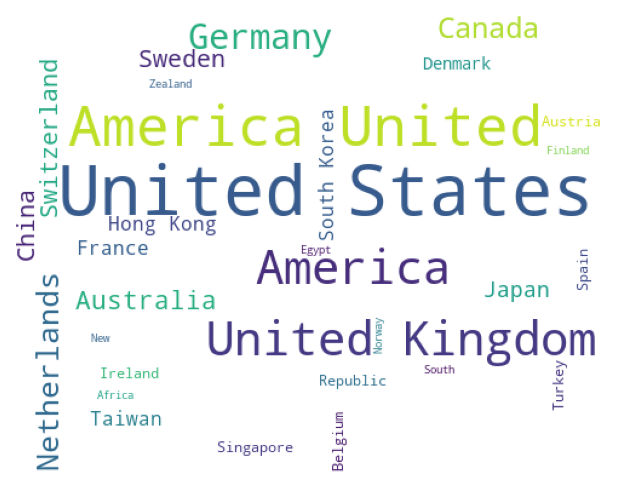

In [41]:
# data prepararion
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<a id="9"></a> <br>
# Diagramas de Caja
* Diagramas de Caja
    * Mediana (percentil 50) = valor medio del conjunto de datos. Ordenar y tomar el dato del medio. También se llama percentil 50% que significa que el 50% de los datos son menores que la mediana (cuartil 50) (cuartil)
        * Percentil 25 = cuartil 1 (Q1) que es el cuartil inferior
        * Percentil 75 = cuartil 3 (Q3) que es el cuartil superior
        * altura de la caja = IQR = rango intercuartílico = Q3-Q1
        * Bigotes = 1.5 * IQR desde Q1 y Q3
        * Valores atípicos = estar más de 1.5*IQR alejados de la mediana comúnmente.
        
    * trace = box
        * y = datos que queremos visualizar con diagrama de caja 
        * marker = color

In [42]:

x2015 = timesData[timesData.year == 2015]
x2015['total_score'].unique()

array(['94.3', '93.3', '93.2', '92.9', '92.0', '91.9', '90.9', '89.5',
       '87.5', '87.1', '85.5', '84.6', '84.4', '83.0', '81.0', '80.9',
       '79.9', '79.4', '79.3', '79.2', '78.7', '76.1', '74.3', '73.3',
       '73.2', '72.8', '72.3', '71.9', '71.8', '71.2', '70.9', '70.4',
       '70.0', '69.9', '69.6', '69.4', '68.6', '67.8', '67.5', '66.8',
       '66.5', '65.9', '65.2', '65.1', '64.8', '64.7', '64.5', '64.1',
       '63.7', '63.6', '62.9', '62.8', '62.7', '62.2', '61.9', '61.3',
       '61.2', '61.1', '61.0', '60.7', '59.8', '59.6', '59.2', '59.1',
       '59.0', '58.9', '58.4', '58.2', '58.1', '58.0', '57.9', '57.6',
       '57.3', '56.9', '56.6', '56.5', '56.4', '56.2', '56.1', '55.5',
       '55.3', '55.2', '55.1', '54.6', '54.3', '54.0', '53.9', '53.8',
       '53.7', '53.6', '53.4', '53.2', '53.1', '53.0', '52.9', '52.8',
       '52.7', '52.6', '52.5', '52.4', '52.1', '52.0', '51.9', '51.6',
       '51.4', '51.2', '51.1', '51.0', '50.9', '50.5', '50.4', '50.3',
      

In [43]:
# data preparation
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(y = x2015['total_score'],
                name = 'Total score in 2015',
               marker = dict(color = 'rgb(12,12,140)'))

trace1 = go.Box(y = x2015['research'],
                name = 'Total research in 2015',
               marker = dict(color = 'rgb(12,128,128)'))


data = [trace0, trace1]
iplot(data)

<a id="10"></a> <br>
# Gráficos de Matriz de Dispersión
Matriz de Dispersión = nos ayuda a ver la covarianza y relación entre más de 2 características
* importar figure factory como ff
* create_scatterplotmatrix = crea gráfico de matriz de dispersión
    * data2015 = datos preparados. Incluye puntuaciones de investigación, internacional y total con índice del 1 al 401
    * colormap = mapa de color del gráfico de dispersión
    * colormap_type = tipo de color del gráfico de dispersión
    * height y width

In [44]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2015,
                                 diag = 'box',
                                 index ='index',
                                 colormap = 'Portland',
                                 height = 700,
                                 width = 700)

iplot(fig)

<a id="11"></a> <br>
# Gráficos Insertados
<font color='red'>
Gráficos Insertados = 2 gráficos están en un marco
<font color='black'>

In [45]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)

# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]

layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


<a id="12"></a> <br>
# Gráfico de Dispersión 3D con Escala de Color
Gráfico de Dispersión 3D: A veces 2D no es suficiente para entender los datos. Por lo tanto, agregar una dimensión más aumenta la inteligibilidad de los datos. Incluso agregaremos color que es en realidad la 4ta dimensión.
* go.Scatter3d: crear gráfico de dispersión 3d
* x,y,z: ejes de los gráficos
* mode: marker que es dispersión
* size: tamaño del marcador
* color: eje de la escala de color
* colorscale: en realidad es la 4ta dimensión

In [46]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(x = dataframe['world_rank'],
                     y = dataframe['research'],
                     z = dataframe['citations'],
                     mode = 'markers',
                     marker = dict(size = 5, color = 'rgb(255,0,0)'))

data = [trace1]
layout = go.Layout(margin = dict(l=0,
                                r=0,
                                b=0,
                                t=0))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="13"></a> <br>
# Múltiples Subgráficos
<font color='red'>
Múltiples Subgráficos: Al comparar más de una característica, múltiples subgráficos pueden ser útiles.
<font color='black'>

In [47]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    xaxis='x1',
    yaxis='y1',
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45],
        anchor='y1'
    ),
    yaxis=dict(
        domain=[0, 0.45],
        anchor='x1'
    ),
    xaxis2=dict(
        domain=[0.55, 1],
        anchor='y2'
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1],
        anchor='x3'
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Exportar a HTML
Las figuras de Plotly son interactivas cuando se visualizan en un navegador web: puedes hacer hover sobre los puntos de datos, hacer pan y zoom en los ejes, y mostrar y ocultar trazas haciendo clic o doble clic en la leyenda. Puedes exportar figuras ya sea a formatos de imagen estática como PNG, JPEG, SVG o PDF o puedes exportarlas a archivos HTML que pueden abrirse en un navegador. Esta página explica cómo hacer esto último.

In [48]:
# fig is the last fig object run in the notebook
fig.write_html("4 charts in one.html")